In [1]:
%reload_kedro

2023-05-03 14:05:19,872 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-03 14:05:20,423 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-03 14:05:20,600 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-03 14:05:20,601 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-03 14:05:21,670 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

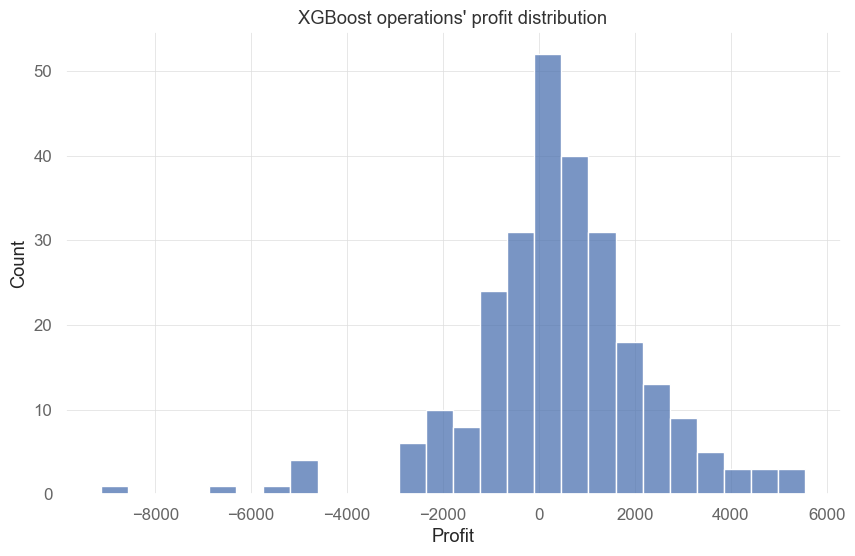

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

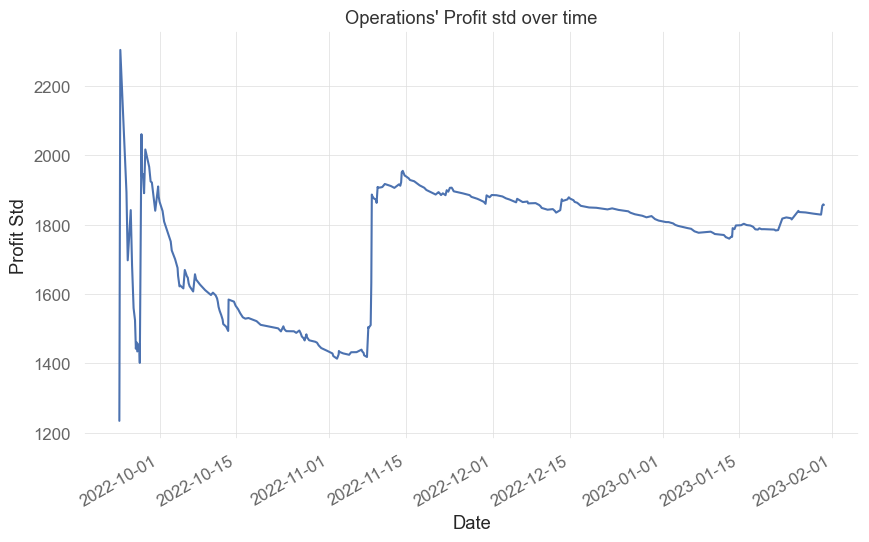

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

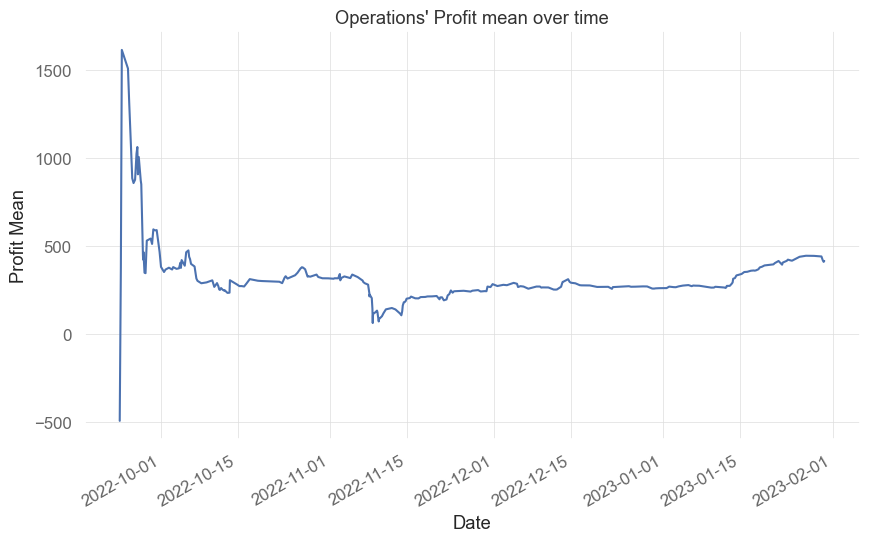

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-03 14:05:23,256 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

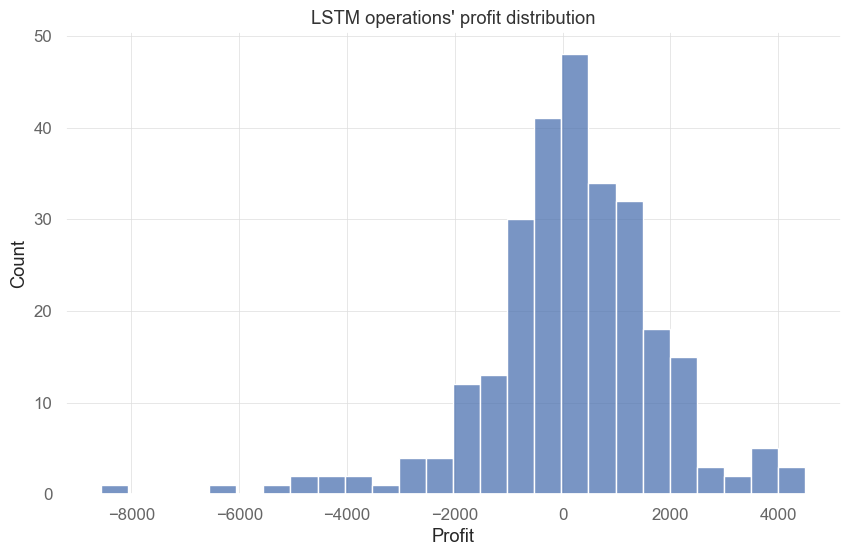

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

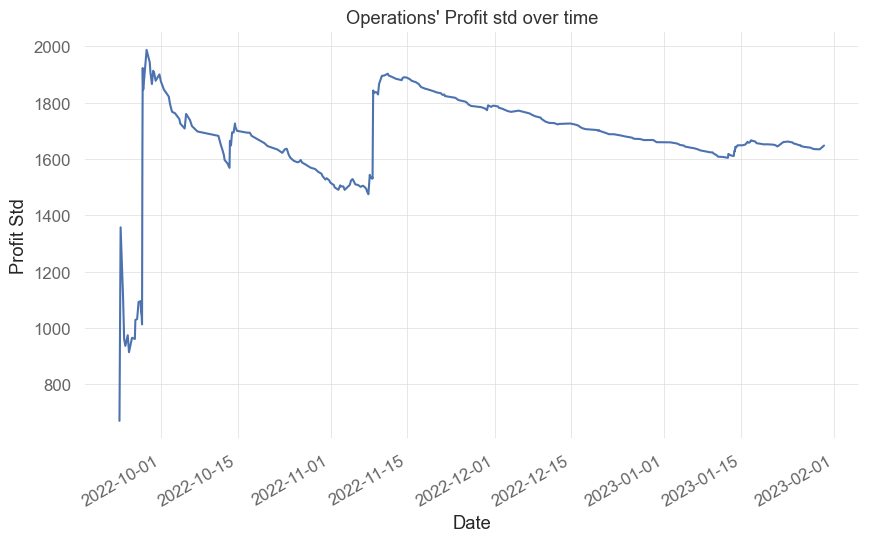

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

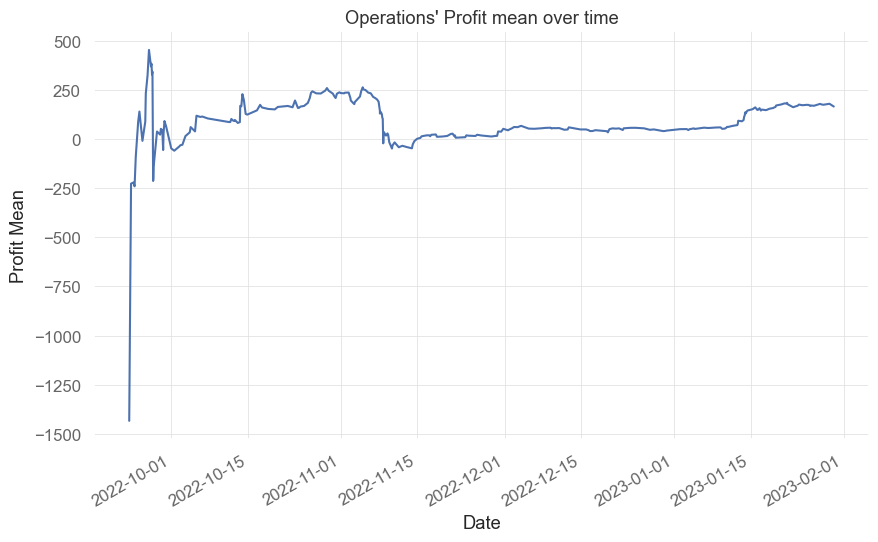

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-03 14:05:25,044 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

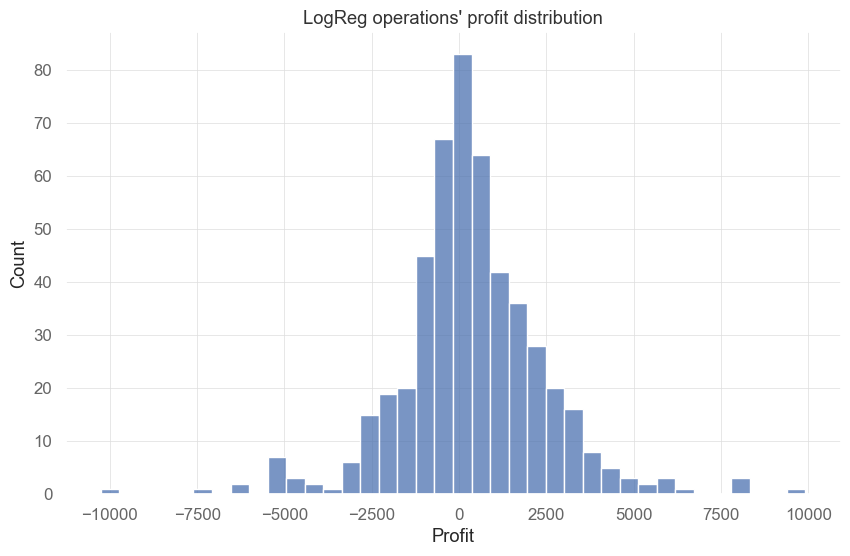

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

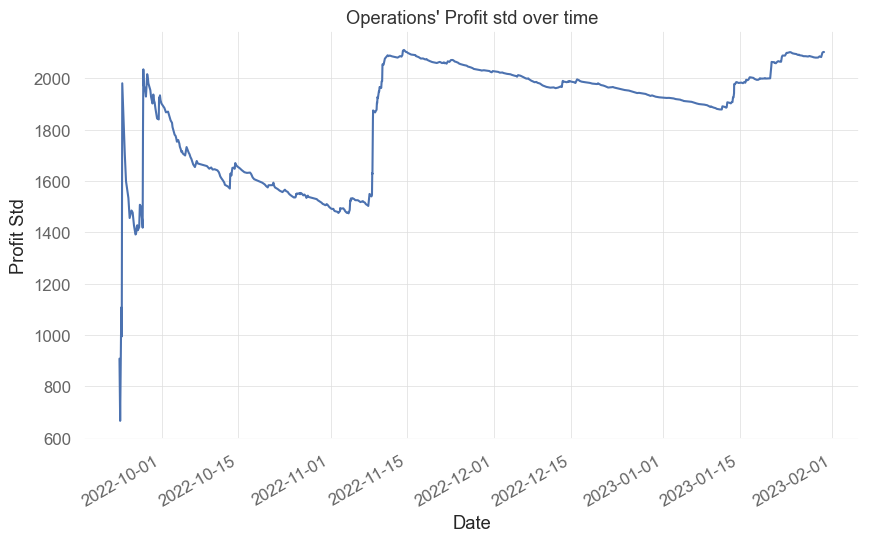

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

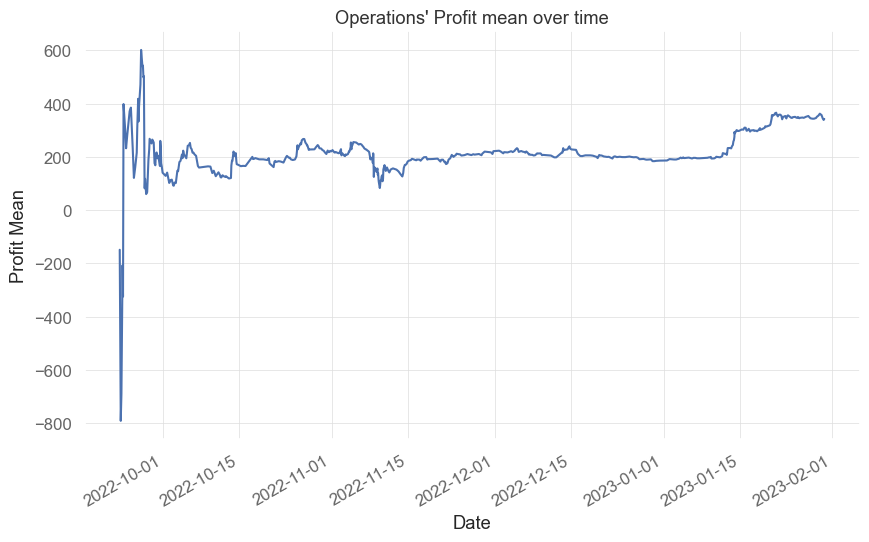

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## XGBoost

### Portfolio overall metrics - Part 1

In [19]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-03 14:05:26,576 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,109373.696779,23,7,xgboost


### Portfolio overall metrics - Part 2

In [20]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-03 14:05:26,595 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [35]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   115.02%
CAGR﹪              772.47%

Sharpe              2.93
Prob. Sharpe Ratio  99.96%
Sortino             4.58
Sortino/√2          3.24
Omega               1.56

Max Drawdown        -15.18%
Longest DD Days     26

Gain/Pain Ratio     1.6
Gain/Pain (1M)      -

Payoff Ratio        1.11
Profit Factor       1.56
Common Sense Ratio  1.99
CPC Index           1.01
Tail Ratio          1.28
Outlier Win Ratio   3.78
Outlier Loss Ratio  4.14

MTD                 45.46%
3M                  73.79%
6M                  115.02%
YTD                 45.46%
1Y                  115.02%
3Y (ann.)           772.47%
5Y (ann.)           772.47%
10Y (ann.)          772.47%
All-time (ann.)     772.47%

Avg. Drawdown       -1.66%
Avg. Drawdown Days  2
Recovery Factor     7.58
Ulcer Index         0.03
Serenity Index   

In [22]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_xgboost_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-03 14:05:27,119 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,45696.017107,10,10,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-03 14:05:27,132 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   30.46%
CAGR﹪              113.47%

Sharpe              1.9
Prob. Sharpe Ratio  94.22%
Sortino             2.64
Sortino/√2          1.87
Omega               1.33

Max Drawdown        -18.39%
Longest DD Days     69

Gain/Pain Ratio     0.55
Gain/Pain (1M)      3.83

Payoff Ratio        0.96
Profit Factor       1.33
Common Sense Ratio  1.34
CPC Index           0.74
Tail Ratio          1.01
Outlier Win Ratio   3.45
Outlier Loss Ratio  4.36

MTD                 22.96%
3M                  15.1%
6M                  30.46%
YTD                 22.96%
1Y                  30.46%
3Y (ann.)           113.47%
5Y (ann.)           113.47%
10Y (ann.)          113.47%
All-time (ann.)     113.47%

Avg. Drawdown       -2.88%
Avg. Drawdown Days  7
Recovery Factor     1.66
Ulcer Index         0.08
Serenity Index    

In [26]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_lstm_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LogReg

### Portfolio overall metrics - Part 1

In [27]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-03 14:05:27,497 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,172532.786634,9,5,LogReg


### Portfolio overall metrics - Part 2

In [28]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-03 14:05:27,511 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [29]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   115.02%
CAGR﹪              772.47%

Sharpe              2.93
Prob. Sharpe Ratio  99.96%
Sortino             4.58
Sortino/√2          3.24
Omega               1.56

Max Drawdown        -15.18%
Longest DD Days     26

Gain/Pain Ratio     1.6
Gain/Pain (1M)      -

Payoff Ratio        1.11
Profit Factor       1.56
Common Sense Ratio  1.99
CPC Index           1.01
Tail Ratio          1.28
Outlier Win Ratio   3.78
Outlier Loss Ratio  4.14

MTD                 45.46%
3M                  73.79%
6M                  115.02%
YTD                 45.46%
1Y                  115.02%
3Y (ann.)           772.47%
5Y (ann.)           772.47%
10Y (ann.)          772.47%
All-time (ann.)     772.47%

Avg. Drawdown       -1.66%
Avg. Drawdown Days  2
Recovery Factor     7.58
Ulcer Index         0.03
Serenity Index   

In [30]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_logreg_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'